In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:853: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:863: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:886: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:895: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


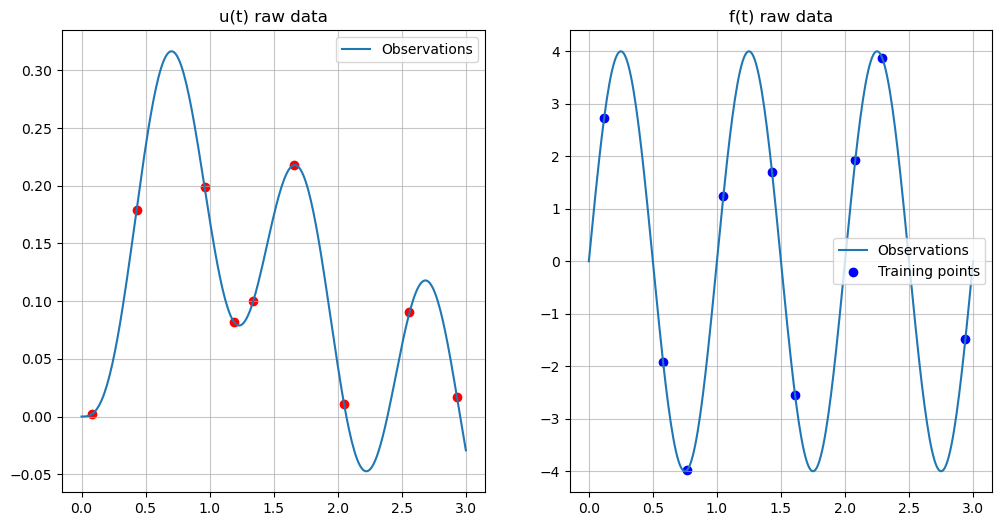

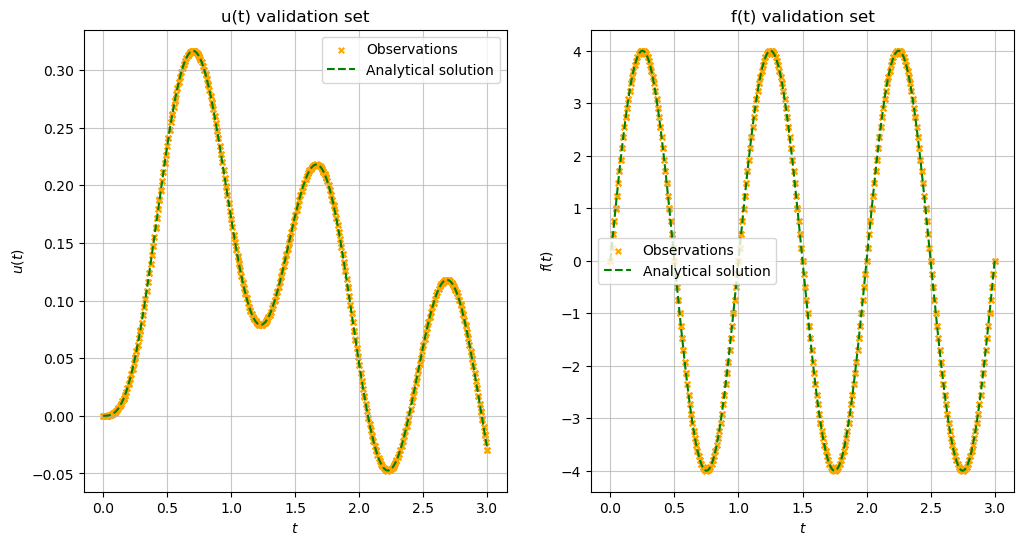

In [2]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params)
model.set_training_data("damped_m1k2b1.csv",9,[1e-8,1e-8],seeds_training)
model.plot_raw_data(Training_points=True)
model.set_validation_data(1200)
model.plot_validation_set()


In [3]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 20, 10

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("Nelder-Mead",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      

100%|██████████| 20/20 [00:05<00:00,  3.86it/s]


 final_simplex: (array([[0.43931725, 0.32709127, 0.9973388 , 1.97791325, 1.97027748],
       [0.43931726, 0.32709127, 0.9973388 , 1.97791325, 1.97027748],
       [0.43931726, 0.32709127, 0.9973388 , 1.97791326, 1.97027749],
       [0.43931726, 0.32709127, 0.9973388 , 1.97791326, 1.97027749],
       [0.43931725, 0.32709127, 0.9973388 , 1.97791325, 1.97027748],
       [0.43931726, 0.32709127, 0.9973388 , 1.97791325, 1.97027748]]), array([-4.047822, -4.047822, -4.047822, -4.047822, -4.047822, -4.047822]))
           fun: -4.047821998596191
       message: 'Optimization terminated successfully.'
          nfev: 836
           nit: 477
        status: 0
       success: True
             x: array([0.43931725, 0.32709127, 0.9973388 , 1.97791325, 1.97027748])


In [4]:
results = {"nf_n=9_melder": (np.array([0.47898825, 0.62987094, 0.998272  , 1.99920782, 2.00517421]),-4.336967468261719, [1e-8,1e-8]),
           "nf_n=9_TNC": (np.array([0.43243174, 0.30849485, 0.99643949, 1.98091363, 1.97461053]),-2.882169723510742, [1e-8,1e-8])
            }

In [5]:
model.set_params(results["nf_n=9_melder"][0])

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:545: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:546: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:559: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:560: RuntimeWarning:invalid value encountered in sqrt


{'u': 3.4509218949096976e-06, 'f': 0.026709560304880142}

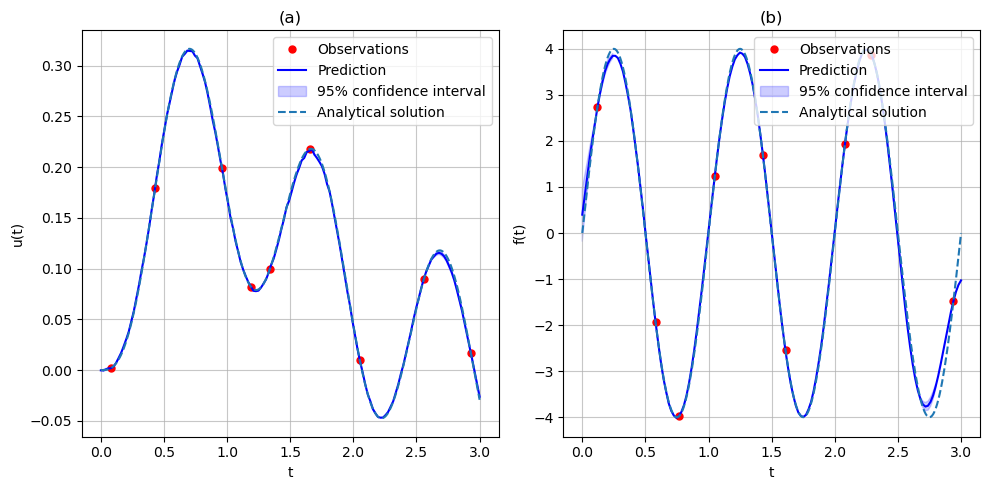

In [6]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction.png")
model.error()
model.MSE
#print(model)

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1002: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1003: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1016: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1017: RuntimeWarning:invalid value encountered in sqrt


---------GPY--------
MSE u:  0.000549224567133918
MSE f:  2.6925084968100346


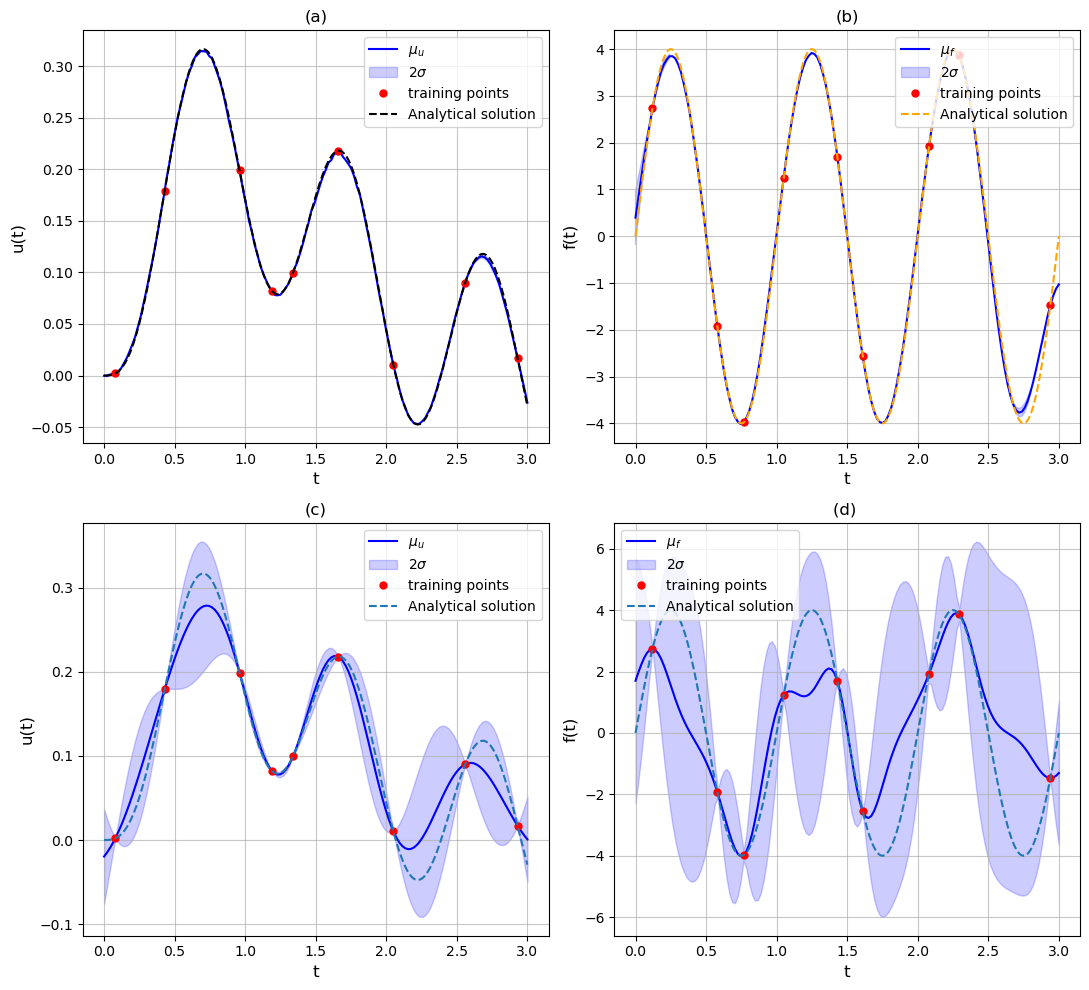

In [7]:
model.plot_merged_1d_plots(X_star, "merged_1d_plots.png",(11,10))

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:853: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:863: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:886: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:895: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
100%|██████████| 20/20 [00:00<00

 final_simplex: (array([[0.20103252, 0.14345021, 1.14938064, 0.35586564, 4.98434817],
       [0.20103252, 0.14345021, 1.14938064, 0.35586564, 4.98434817],
       [0.20103252, 0.14345021, 1.14938064, 0.35586564, 4.98434817],
       [0.20103252, 0.14345021, 1.14938064, 0.35586564, 4.98434817],
       [0.20103252, 0.14345021, 1.14938064, 0.35586564, 4.98434817],
       [0.20103252, 0.14345021, 1.14938064, 0.35586564, 4.98434817]]), array([8.8324604, 8.8324604, 8.8324604, 8.8324604, 8.8324604, 8.8324604]))
           fun: 8.832460403442383
       message: 'Optimization terminated successfully.'
          nfev: 658
           nit: 353
        status: 0
       success: True
             x: array([0.20103252, 0.14345021, 1.14938064, 0.35586564, 4.98434817])


{'u': 0.00015194063598755747, 'f': 1.4195972681045532}

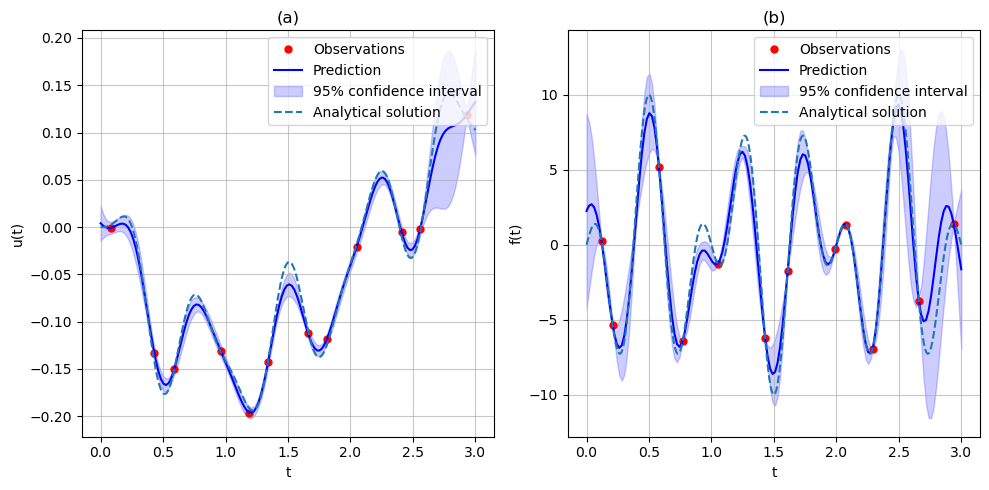

In [8]:
model2 = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params)
model2.set_training_data("damped_second_m1b02k2.csv",12,[1e-5,1e-7],seeds_training)
model2.set_validation_data(1000)
n_iterations = 20
model2.train("Nelder-Mead",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})model2.set_params(x2)
model2.predict_model(X_star)
model2.plot_prediction(X_star, "prediction", "prediction_second_example.png")
model2.error()
model2.MSE
